In [1]:
#using TaylorSeries
include("UndrivenHelium.jl")
#include("Integ.jl")
using Plots, LaTeXStrings
# plotly()
pyplot(grid = :false, size=(600,600), color=:black, markersize = 0.3 )
const Z = 2.0
const order = 34
const t0 = 0.0
const t_max = 0.5 
const abs_tol = 1.0E-20
const steps = 8_000;

In [2]:
include("Integ.jl")

taylorintegps (generic function with 1 method)

In [3]:
#Cargamos soluciones en archivos de texto
xvSv = Array{Float64,2}[]
xvSv2 = Array{Float64,2}[]


for j in 1:2000
    dir =string("MonteCarlo/xvSv",string(j),".csv")
    x = readcsv(dir)
    push!(xvSv, x)
end

for j in 1:500
    dir =string("Circ/xvSv",string(j),".csv")
    x = readcsv(dir)
    push!(xvSv2, x)
end

In [7]:
LOL = xvSv2[1]
LOL2 = xvSv2[2]

157×4 Array{Float64,2}:
 5.8004   0.0           2.20985e-8   Inf         
 5.8004   0.0           1.15114e-7  -Inf         
 5.8004   3.08149e-33   1.87641e-7     3.60288e16
 5.8004   0.0           2.2677e-7   -Inf         
 5.8004   0.0           2.25537e-7   Inf         
 5.8004   0.0           1.84161e-7  -Inf         
 5.8004   0.0           1.10007e-7   Inf         
 5.80041  0.0           1.62724e-8  -Inf         
 5.8004   0.0          -8.0358e-8    Inf         
 5.8004   0.0          -1.62686e-7  -Inf         
 5.8004   0.0          -2.16057e-7   Inf         
 5.8004   0.0          -2.30974e-7  -Inf         
 5.8004   0.0          -2.04779e-7   Inf         
 ⋮                                               
 5.8004   0.0          -2.0618e-7   -Inf         
 5.8004   0.0          -1.4453e-7    Inf         
 5.8004   7.70372e-34  -5.71542e-8     7.20576e16
 5.8004   0.0           4.0394e-8    Inf         
 5.8004   0.0           1.30752e-7  -Inf         
 5.8004   0.0           1.

In [8]:
LOL2 -= LOL

157×4 Array{Float64,2}:
  1.54679e-9   0.0           4.70926e-8   NaN
  2.12569e-7   0.0           4.2843e-8    NaN
  3.85756e-7   3.08149e-33   3.09678e-8  -Inf
  4.90284e-7   0.0           1.35808e-8   NaN
  5.07547e-7   0.0          -6.22347e-9   NaN
  4.34473e-7  -3.08149e-33  -2.492e-8    -Inf
  2.84068e-7   0.0          -3.91811e-8   NaN
  8.31029e-8   0.0          -4.64684e-8   NaN
 -1.32653e-7   0.0          -4.54849e-8   NaN
 -3.24799e-7   0.0          -3.64058e-8   NaN
 -4.59135e-7   0.0          -2.08468e-8   NaN
 -5.1175e-7    0.0          -1.57736e-9   NaN
 -4.7328e-7    0.0           1.79729e-8   NaN
  ⋮                                          
 -4.75814e-7   0.0           1.73979e-8   NaN
 -3.55458e-7   0.0           3.38964e-8   NaN
 -1.71836e-7   7.70372e-34   4.43618e-8   Inf
  4.23716e-8   0.0           4.69313e-8   NaN
  2.49037e-7   0.0           4.11476e-8   NaN
  4.11377e-7   0.0           2.80402e-8   NaN
  5.00497e-7   0.0           9.94189e-9   NaN
  5.00535e

In [4]:
xvSv2[2]

157×4 Array{Float64,2}:
 5.8004   0.0           2.20985e-8   Inf         
 5.8004   0.0           1.15114e-7  -Inf         
 5.8004   3.08149e-33   1.87641e-7     3.60288e16
 5.8004   0.0           2.2677e-7   -Inf         
 5.8004   0.0           2.25537e-7   Inf         
 5.8004   0.0           1.84161e-7  -Inf         
 5.8004   0.0           1.10007e-7   Inf         
 5.80041  0.0           1.62724e-8  -Inf         
 5.8004   0.0          -8.0358e-8    Inf         
 5.8004   0.0          -1.62686e-7  -Inf         
 5.8004   0.0          -2.16057e-7   Inf         
 5.8004   0.0          -2.30974e-7  -Inf         
 5.8004   0.0          -2.04779e-7   Inf         
 ⋮                                               
 5.8004   0.0          -2.0618e-7   -Inf         
 5.8004   0.0          -1.4453e-7    Inf         
 5.8004   7.70372e-34  -5.71542e-8     7.20576e16
 5.8004   0.0           4.0394e-8    Inf         
 5.8004   0.0           1.30752e-7  -Inf         
 5.8004   0.0           1.

In [9]:
xsv = copy(xvSv)
x0 = xvSv[1]
for k in 1:length(xvSv)
    xsv[k] -= x0
end

xsv2 = copy(xvSv2)
x0 = xvSv2[1]
for k in 1:length(xvSv2)
    xsv2[k] -= x0
end

In [12]:
#Vemos si las cosas se salen de control
poincareuh = @animate for i=1:157
    scatter(map(x->x[i,1], xvSv), map(x->x[i,3], xvSv), label="$(i)-th iterate", m=(1,stroke(0)))
    scatter!(map(x->x[i,1], xvSv2), map(x->x[i,3], xvSv2), label="$(i)-th iterate", m=(1,stroke(0)), color = :red)
    xlims!(5.8003997,5.8004053)
    ylims!(-0.00000025,0.00000025)
    xlabel!("x")
    ylabel!("pₓ")
    title!("UH Poincaré map near at point (5.8004, 0.0)")
end
gif(poincareuh, "./poincareuh2.gif", fps = 2)

INFO: Saved animation to /home/daniel/Documents/2017-2/Tesis/UndrivenHelium/TaylorIntegration/poincareuh2.gif


Plots.AnimatedGif("/home/daniel/Documents/2017-2/Tesis/UndrivenHelium/TaylorIntegration/poincareuh2.gif")

In [26]:
poincareuh = @animate for i=1:15:157
    scatter(map(x->x[i,1], xvSv), map(x->x[i,3], xvSv), label="$(i)-th iterate", m=(1,stroke(0)))
    scatter!(map(x->x[i,1], xvSv2), map(x->x[i,3], xvSv2), label="$(i)-th iterate", m=(1,stroke(0)), color = :red)
    xlims!(5.8003997,5.8004053)
    ylims!(-0.00000025,0.00000025)
    xlabel!("x")
    ylabel!("pₓ")
    title!("UH Poincaré map near at point (5.8004, 0.0)")
end
gif(poincareuh, "./poincareuh4.gif", fps = 2)

INFO: Saved animation to /home/daniel/Documents/2017-2/Tesis/UndrivenHelium/TaylorIntegration/poincareuh4.gif


Plots.AnimatedGif("/home/daniel/Documents/2017-2/Tesis/UndrivenHelium/TaylorIntegration/poincareuh4.gif")


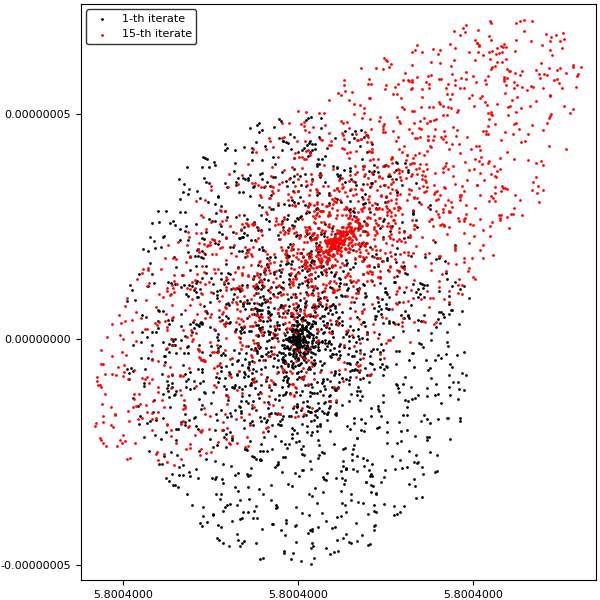

In [32]:
scatter(map(x->x[1,1], xvSv), map(x->x[1,3], xvSv), label="$(1)-th iterate", m=(2,stroke(0)))
scatter!(map(x->x[16,1], xvSv), map(x->x[16,3], xvSv), label="$(16)-th iterate", m=(2,stroke(0)), color = :red)

In [24]:

#Vemos la evolución del volumen
poincareuh = @animate for i=1:157
    scatter(map(x->x[i,1], xsv), map(x->x[i,3], xsv), label="$(i)-th iterate", m=(2,stroke(0)))
    #scatter!(map(x->x[i,1], xsv2), map(x->x[i,3], xsv2), label="$(i)-th iterate", m=(1,stroke(0)), color = :red)
    xlims!(-0.0000005,0.0000005)
    ylims!(-0.0000005,0.0000005)
    xlabel!("x")
    ylabel!("pₓ")
    title!("UH Poincaré map near at point (5.8004, 0.0)")
end
gif(poincareuh, "./poincareuh3.gif", fps = 2)

INFO: Saved animation to /home/daniel/Documents/2017-2/Tesis/UndrivenHelium/TaylorIntegration/poincareuh3.gif


Plots.AnimatedGif("/home/daniel/Documents/2017-2/Tesis/UndrivenHelium/TaylorIntegration/poincareuh3.gif")